In [1]:
from basic_pitch.inference import predict
import pretty_midi
from basic_pitch import ICASSP_2022_MODEL_PATH
from IPython.display import Audio

In [2]:
model_output, midi_data, note_events = predict("data/kolduna.mpeg", onset_threshold=0.6)


Predicting MIDI for data/kolduna.mpeg...


In [4]:
midi_data.write("data/midi/kolduna.mid")

In [178]:
def midi_to_notes(midi_data) -> list[pretty_midi.Note]:
    notes = []
    beats_per_second = midi_data.estimate_tempo() / 60
    avg_note_time = 1 / beats_per_second
    print(avg_note_time)
    for instrument in midi_data.instruments:
        for i, note in enumerate(instrument.notes):

            notes.append(note)

    return notes

In [179]:
# midi_data = pretty_midi.PrettyMIDI("path_to_new_midi_file.mid")
notes = midi_to_notes(midi_data)
notes


0.3526990529545147


[Note(start=0.011610, end=0.371519, pitch=33, velocity=59),
 Note(start=0.406349, end=0.568889, pitch=28, velocity=47),
 Note(start=0.754649, end=0.952018, pitch=37, velocity=43),
 Note(start=2.961828, end=3.344957, pitch=77, velocity=85),
 Note(start=3.344957, end=3.577157, pitch=76, velocity=83),
 Note(start=3.577157, end=3.948676, pitch=76, velocity=82),
 Note(start=3.948676, end=4.158940, pitch=74, velocity=86),
 Note(start=4.158940, end=4.739439, pitch=74, velocity=80),
 Note(start=4.565289, end=4.762659, pitch=77, velocity=79),
 Note(start=4.762659, end=5.145788, pitch=76, velocity=73),
 Note(start=5.157398, end=5.563747, pitch=74, velocity=90),
 Note(start=5.563747, end=5.842386, pitch=74, velocity=78),
 Note(start=5.749507, end=5.946876, pitch=76, velocity=75),
 Note(start=5.946876, end=6.377729, pitch=77, velocity=71),
 Note(start=6.238410, end=6.691199, pitch=83, velocity=67),
 Note(start=6.528659, end=6.760859, pitch=81, velocity=79),
 Note(start=6.760859, end=7.364577, pitc

In [144]:
import numpy as np
from bokeh.layouts import layout
from bokeh.models import Div
from bokeh.plotting import figure, show

# create a plot demonstrating a sine wave
p1 = figure(height=300)

p1.xaxis.fixed_location = 0

# create a plot demonstrating a cosine wave
p2 = figure(height=300)

for note in notes:
    p1.line((note.start, note.end), note.pitch, line_width=7, line_color="darkgreen")

for i, note in enumerate(notes):
    if i % 3 == 0:
        p2.line((note.start, note.end), note.pitch + i % 6 + 1, line_width=7, line_color="red")
        continue
    p2.line((note.start, note.end), note.pitch, line_width=7, line_color="darkgreen")

p2.xaxis.fixed_location = 0

# define the layout
layout = layout(
    [
        p1,
        p2,
    ],
    sizing_mode="stretch_width",
)

show(layout)

In [7]:
for note in notes:
    time = note.end - note.start
    print(f"start: {note.start} end: {note.end}")
    print(pretty_midi.note_number_to_name(note.pitch), note.pitch)
    print("-" * 15)

start: 0.6613636363636364 end: 1.0909090909090908
C4 60
---------------
start: 1.1022727272727273 end: 1.509090909090909
A4 69
---------------
start: 1.509090909090909 end: 1.893181818181818
A4 69
---------------
start: 1.9045454545454545 end: 2.2409090909090907
G4 67
---------------
start: 2.2886363636363636 end: 2.684090909090909
A4 69
---------------
start: 2.684090909090909 end: 3.065909090909091
F4 65
---------------
start: 3.102272727272727 end: 3.506818181818182
C4 60
---------------
start: 3.506818181818182 end: 3.9136363636363636
C4 60
---------------
start: 3.9136363636363636 end: 4.286363636363636
C4 60
---------------
start: 4.309090909090909 end: 5.1
A4 69
---------------
start: 4.8545454545454545 end: 5.1
A4 69
---------------
start: 5.134090909090909 end: 5.493181818181818
A#4 70
---------------
start: 5.506818181818182 end: 5.86590909090909
D5 74
---------------
start: 5.959090909090909 end: 6.877272727272727
C5 72
---------------
start: 6.761363636363636 end: 6.9477272

In [7]:
note = midi_data.instruments[0].notes[0]
pretty_midi.note_number_to_name(note.pitch)

'C4'

# Music21

In [1]:
import os
from PIL import Image
from music21 import *
import music21.note
from music21.note import Note as Note21

In [2]:
us = environment.UserSettings()
us_path = us.getSettingsPath()
if not os.path.exists(us_path):
    us.create()
print('Path to music21 environment', us_path)
print(us)

Path to music21 environment C:\Users\user\AppData\Roaming\music21-settings.xml
{'directoryScratch': None, 'lilypondPath': 'C:\\Program Files\\lilypond-2.24.3\\bin\\lilypond.exe', 'lilypondVersion': None, 'lilypondFormat': 'pdf', 'lilypondBackend': 'ps', 'musicxmlPath': 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe', 'midiPath': None, 'graphicsPath': None, 'vectorPath': None, 'pdfPath': None, 'braillePath': None, 'musescoreDirectPNGPath': 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe', 'showFormat': 'musicxml', 'writeFormat': 'musicxml', 'ipythonShowFormat': 'ipython.musicxml.png', 'autoDownload': 'ask', 'debug': '0', 'warnings': '1', 'localCorpusSettings': LocalCorpusSettings([]), 'localCorporaSettings': {}, 'manualCoreCorpusPath': None}


In [79]:
us['musescoreDirectPNGPath'] = r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe'
us['musicxmlPath'] = r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe'
us['lilypondPath'] = r'C:\Program Files\lilypond-2.24.3\bin\lilypond.exe'

In [97]:
lpc = lily.translate.LilypondConverter()
lpc.variantColors = True
lpc.coloredVariants = ['blue']
lpc.appendM21ObjectToContext(stream2)
lpc.createSVG("a.svg")

WindowsPath('a.svg.svg')

In [92]:
conv =  music21.converter.subConverters.ConverterLilypond()
scorename = 'myScoreName'
filepath = scorename
conv.write(stream2, fmt = 'lilypond', fp=filepath, subformats = ['pdf'], coloredVariants=True)

WindowsPath('myScoreName.pdf')

## Midi to score

In [218]:
midi_data = pretty_midi.PrettyMIDI("data/midi/k1.mid")

notes = midi_to_notes(midi_data)
tempo = 170
notes_in_one_sec = tempo / 60
one_time = round(1 / notes_in_one_sec, 2)

print("tempo:", tempo)
print("a ONE time:", one_time)

m21_notes = []
stream1 = stream.Stream()

start_time = notes[0].start
for i, _note in enumerate(notes):
    options = [0.5, 1, 1.5, 4]
    pause_options = [1]

    name = pretty_midi.note_number_to_name(_note.pitch)
    rest = None
    if i + 1 < len(notes):
        next_note = notes[i + 1]

        if next_note.start < _note.end:
            _note.end = next_note.start
        pause_fraction = (next_note.start - _note.end) / one_time
        if pause_fraction > 0.7:
            rest_fraction = min(pause_options, key=lambda x: abs(x - pause_fraction))
            rest = music21.note.Rest(quarterLength=rest_fraction)

    note_time = _note.end - _note.start
    note_fraction = note_time / one_time

    note_fraction = min(options, key=lambda x: abs(x - note_fraction))
    m21_note = Note21(name, quarterLength=note_fraction)

    m21_notes.append(m21_note)
    stream1.append(m21_note)
    if rest is not None:
        stream1.append(rest)

0.23437476562500012
tempo: 170
a ONE time: 0.35


In [86]:
stream2 = converter.parse(r"E:\AI Talent Hub\SymphonicMasks\KIDS\kids_app\media\submissions\1\1.xml", forceSource=True)
stream1 = converter.parse(r"k.xml", forceSource=True)

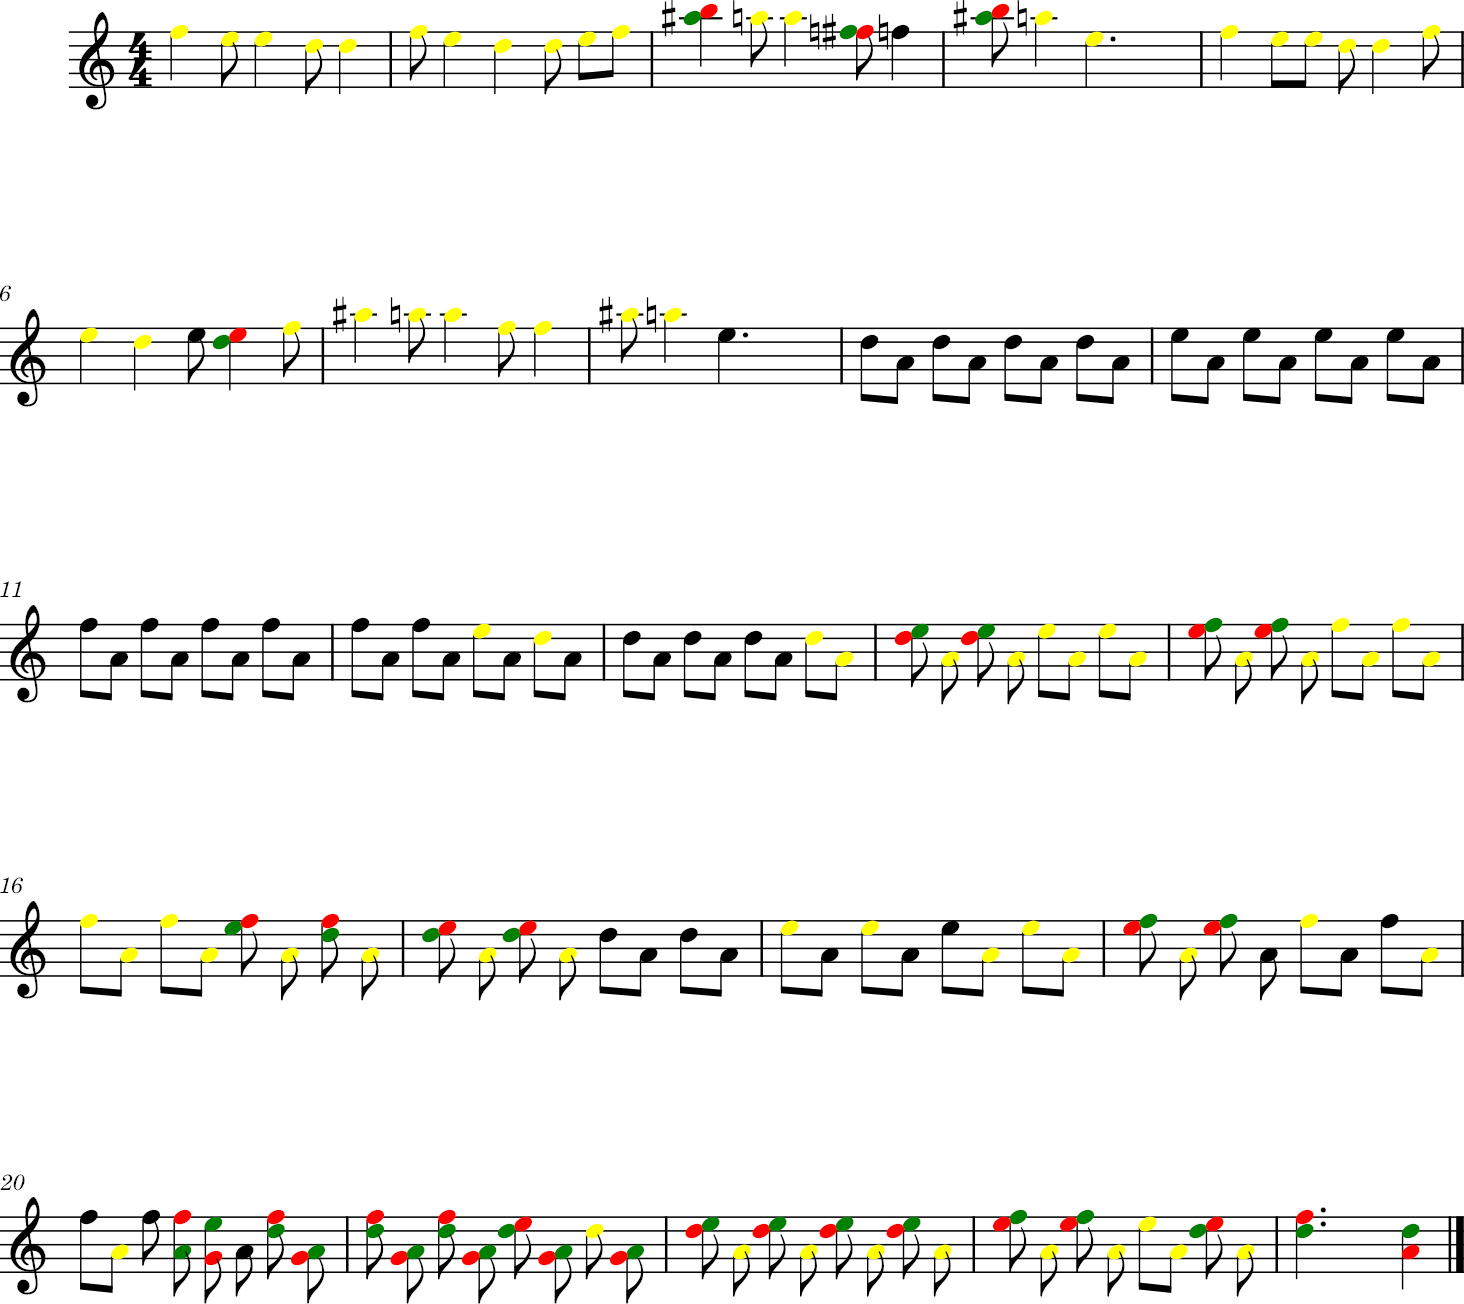

In [87]:
stream.Stream(stream2.parts[0].flatten().notes).show()

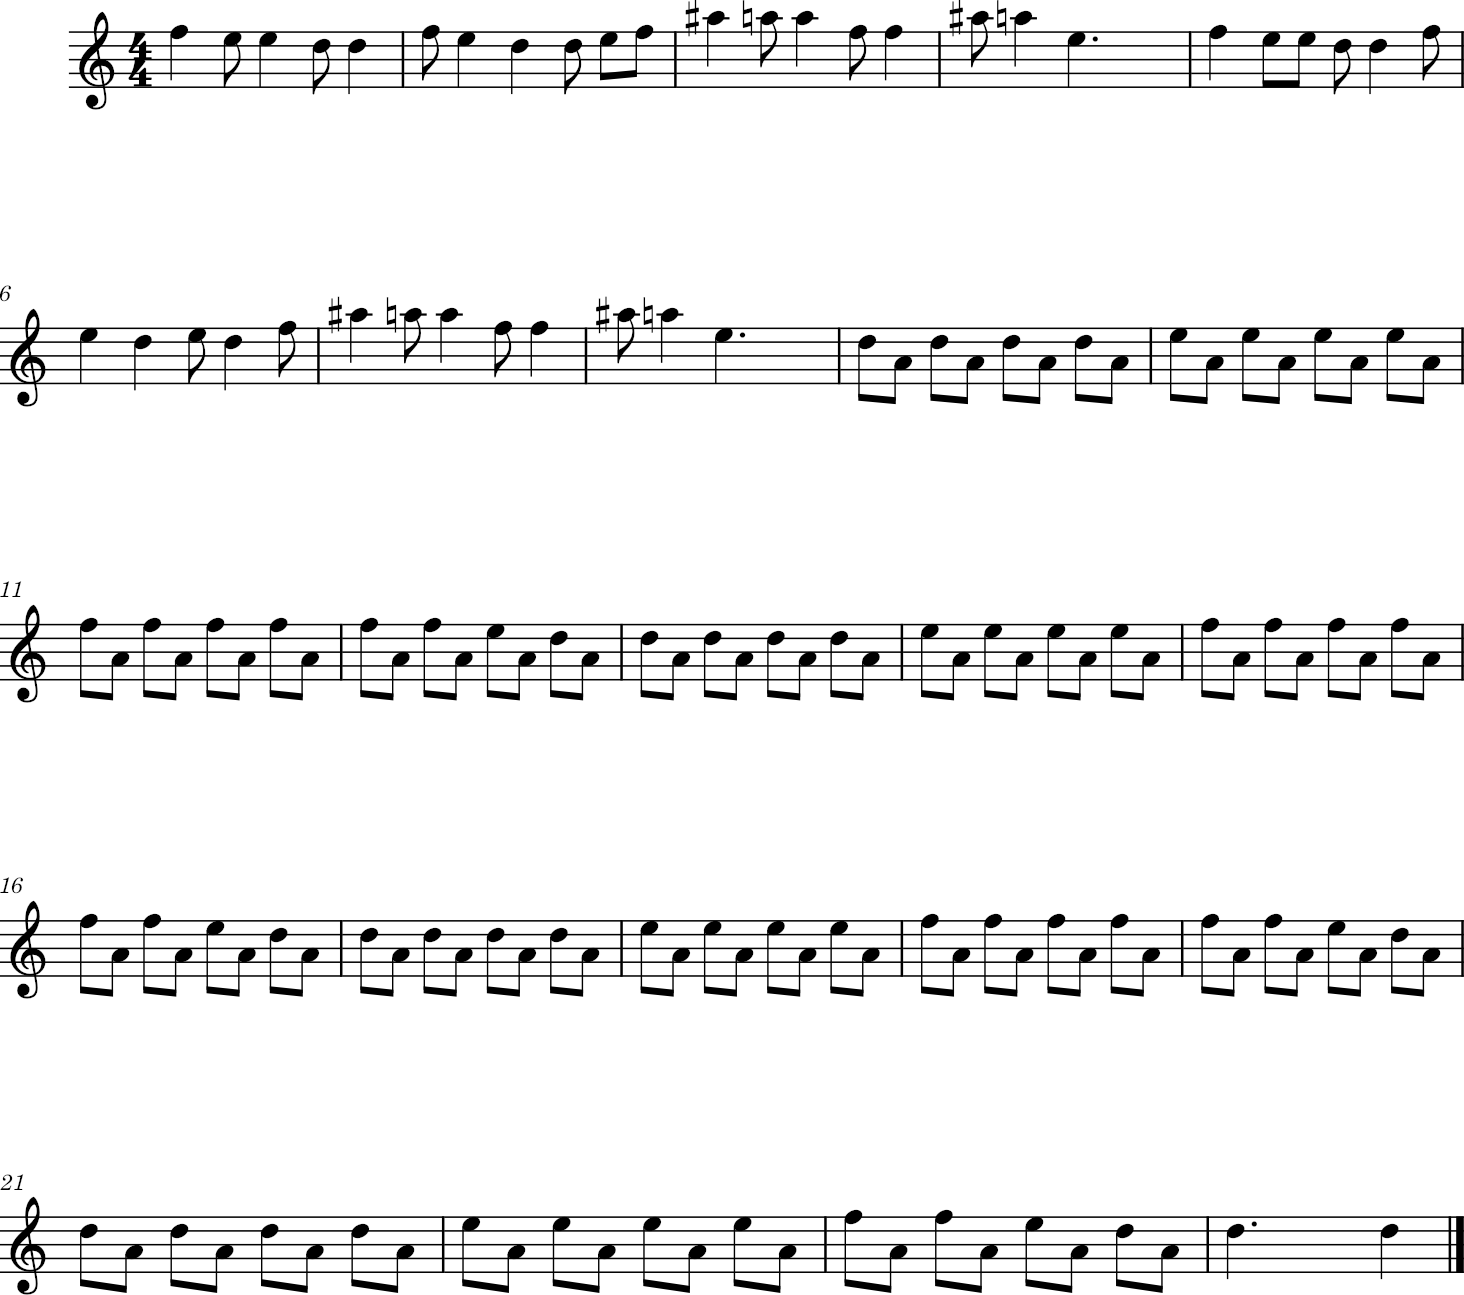

In [54]:
stream.Stream(stream1.parts[0].flatten().notes).show()

In [220]:
# sf = freezeThaw.StreamFreezer(stream1)
# data = sf.writeStr(fmt='pickle')
stream1.write("musicxml", fp="k.xml")

WindowsPath('E:/AI Talent Hub/SymphonicMasks/KIDS/k.xml')

In [221]:
stream_notes = stream1.notes
fractions = []
original_notes = []
for note in stream_notes:
    if note.isRest:
        continue
    original_notes.append(note.nameWithOctave)
    fractions.append(note.quarterLength)

In [223]:
_, midi_data, __ = predict("data/k_e1.mpeg", onset_threshold=0.6)

Predicting MIDI for data/k_e1.mpeg...


0.3526990529545147


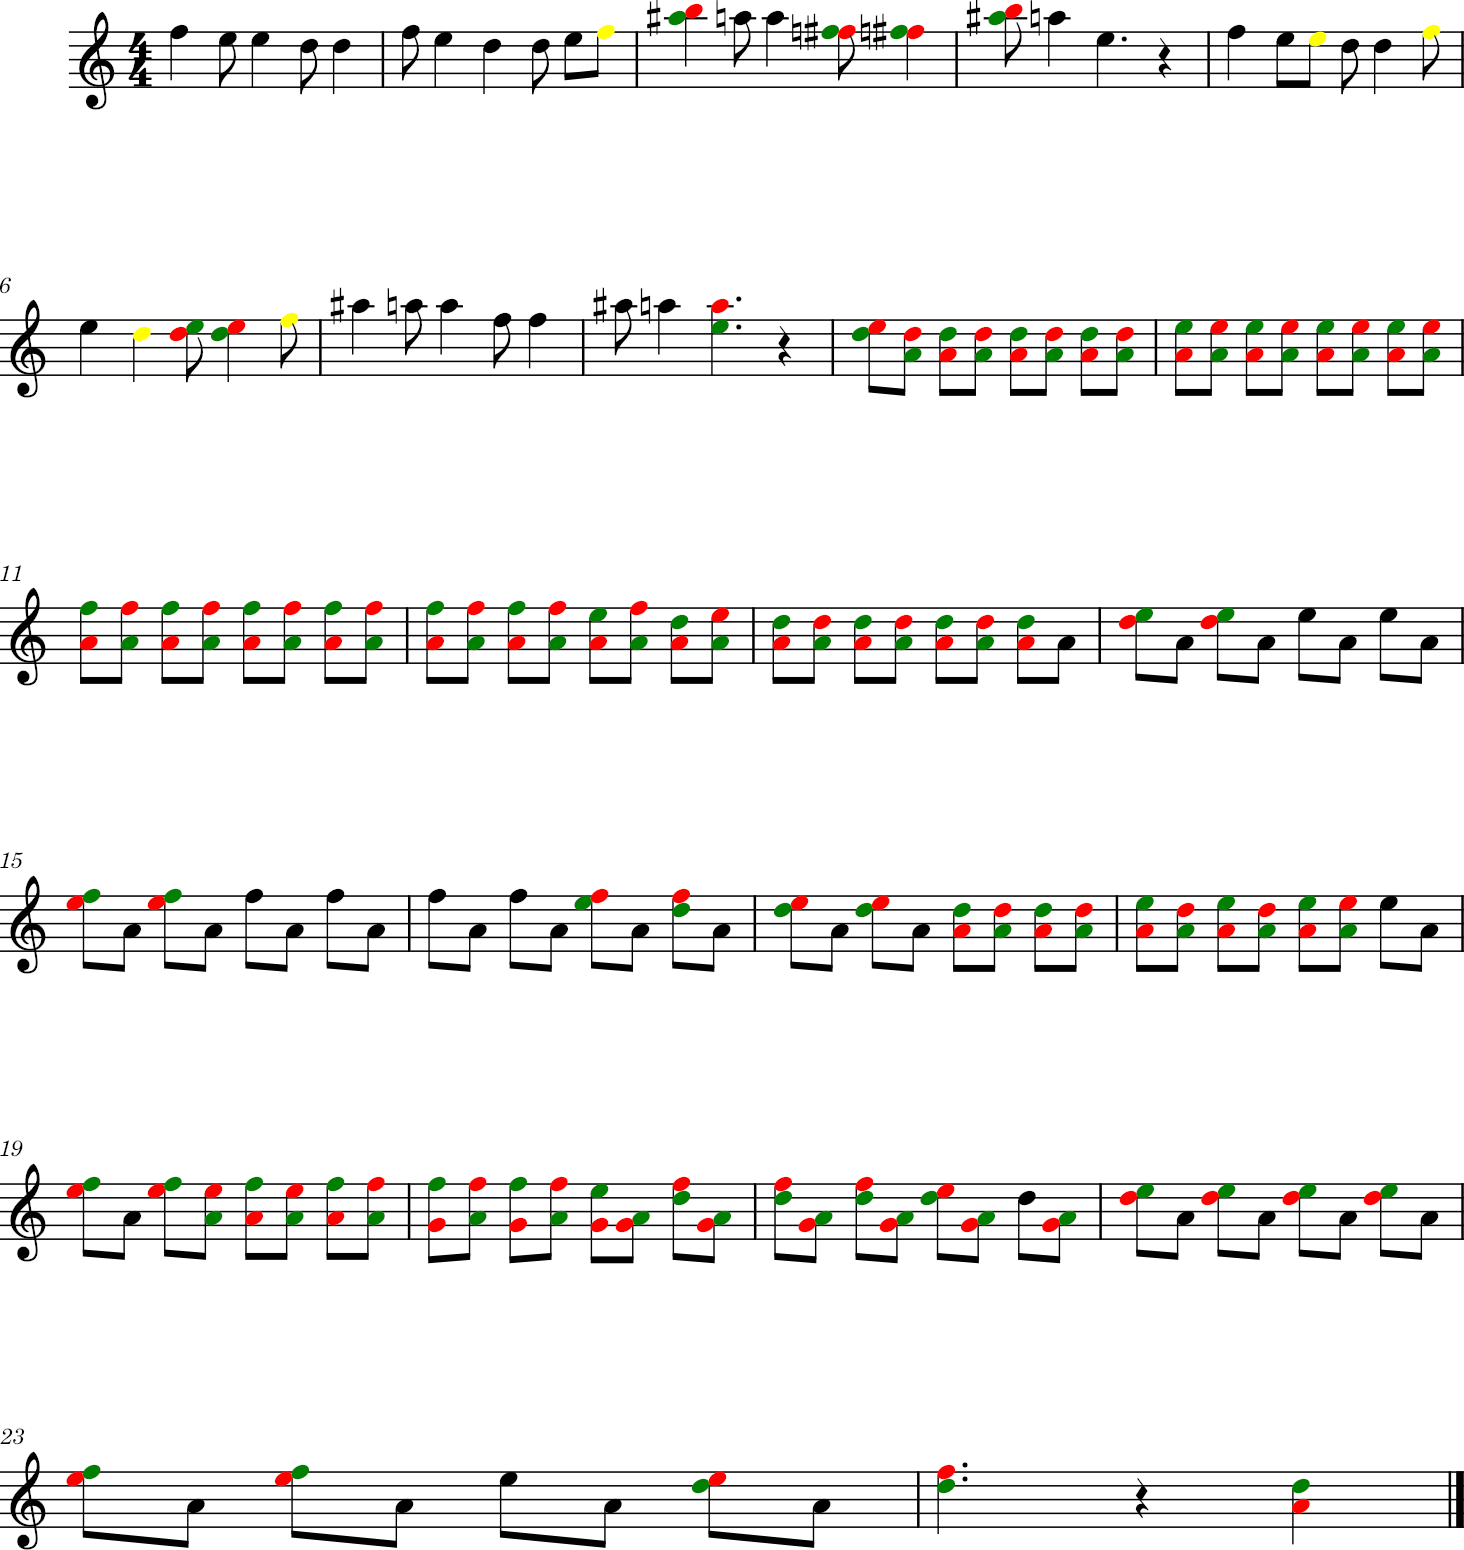

In [226]:
import copy

# midi_data = pretty_midi.PrettyMIDI("data/midi/k.mid")
notes = midi_to_notes(midi_data)
tempo = midi_data.estimate_tempo()
notes_in_one_sec = tempo / 60
one_time = round(1 / notes_in_one_sec, 2)

start_time = notes[0].start
name = pretty_midi.note_number_to_name(notes[0].pitch)
results = []
stream_error = copy.deepcopy(stream1)

while name != original_notes[0]:
    notes.pop(0)
    name = pretty_midi.note_number_to_name(notes[0].pitch)

for i, _note in enumerate(notes):
    if i >= len(original_notes):
        break
    options = [0.5, 1, 1.5, 4]
    name = pretty_midi.note_number_to_name(_note.pitch)
    rest = None

    if i + 1 < len(notes):
        next_note = notes[i + 1]
        if next_note.start < _note.end:
            _note.end = next_note.start
        pause_fraction = (next_note.start - _note.end) / one_time
        if pause_fraction > 0.7:
            rest_fraction = min(options, key=lambda x: abs(x - pause_fraction))
            rest = music21.note.Rest(quarterLength=rest_fraction)

    note_time = _note.end - _note.start
    note_fraction = note_time / one_time
    note_fraction = min(options, key=lambda x: abs(x - note_fraction))

    if name != original_notes[i]:
        error = "NOTE"
        wrong_note = Note21(name, quarterLength=fractions[i])
        wrong_note.style.color = "red"

        orig_note = stream_error.notes[i]
        orig_note.style.color = "green"

        chord_notes = [orig_note, wrong_note]
        chord_element = chord.Chord(chord_notes)

        stream_error.replace(stream_error.notes[i], chord_element)

    elif note_fraction != fractions[i]:
        error = f"DUR_{note_fraction != fractions[i]}"
        stream_error.notes[i].style.color = "yellow"
    else:
        error = None

    results.append({"index": i, "note": name, "duration": note_fraction, "error": error})

stream_error.show()

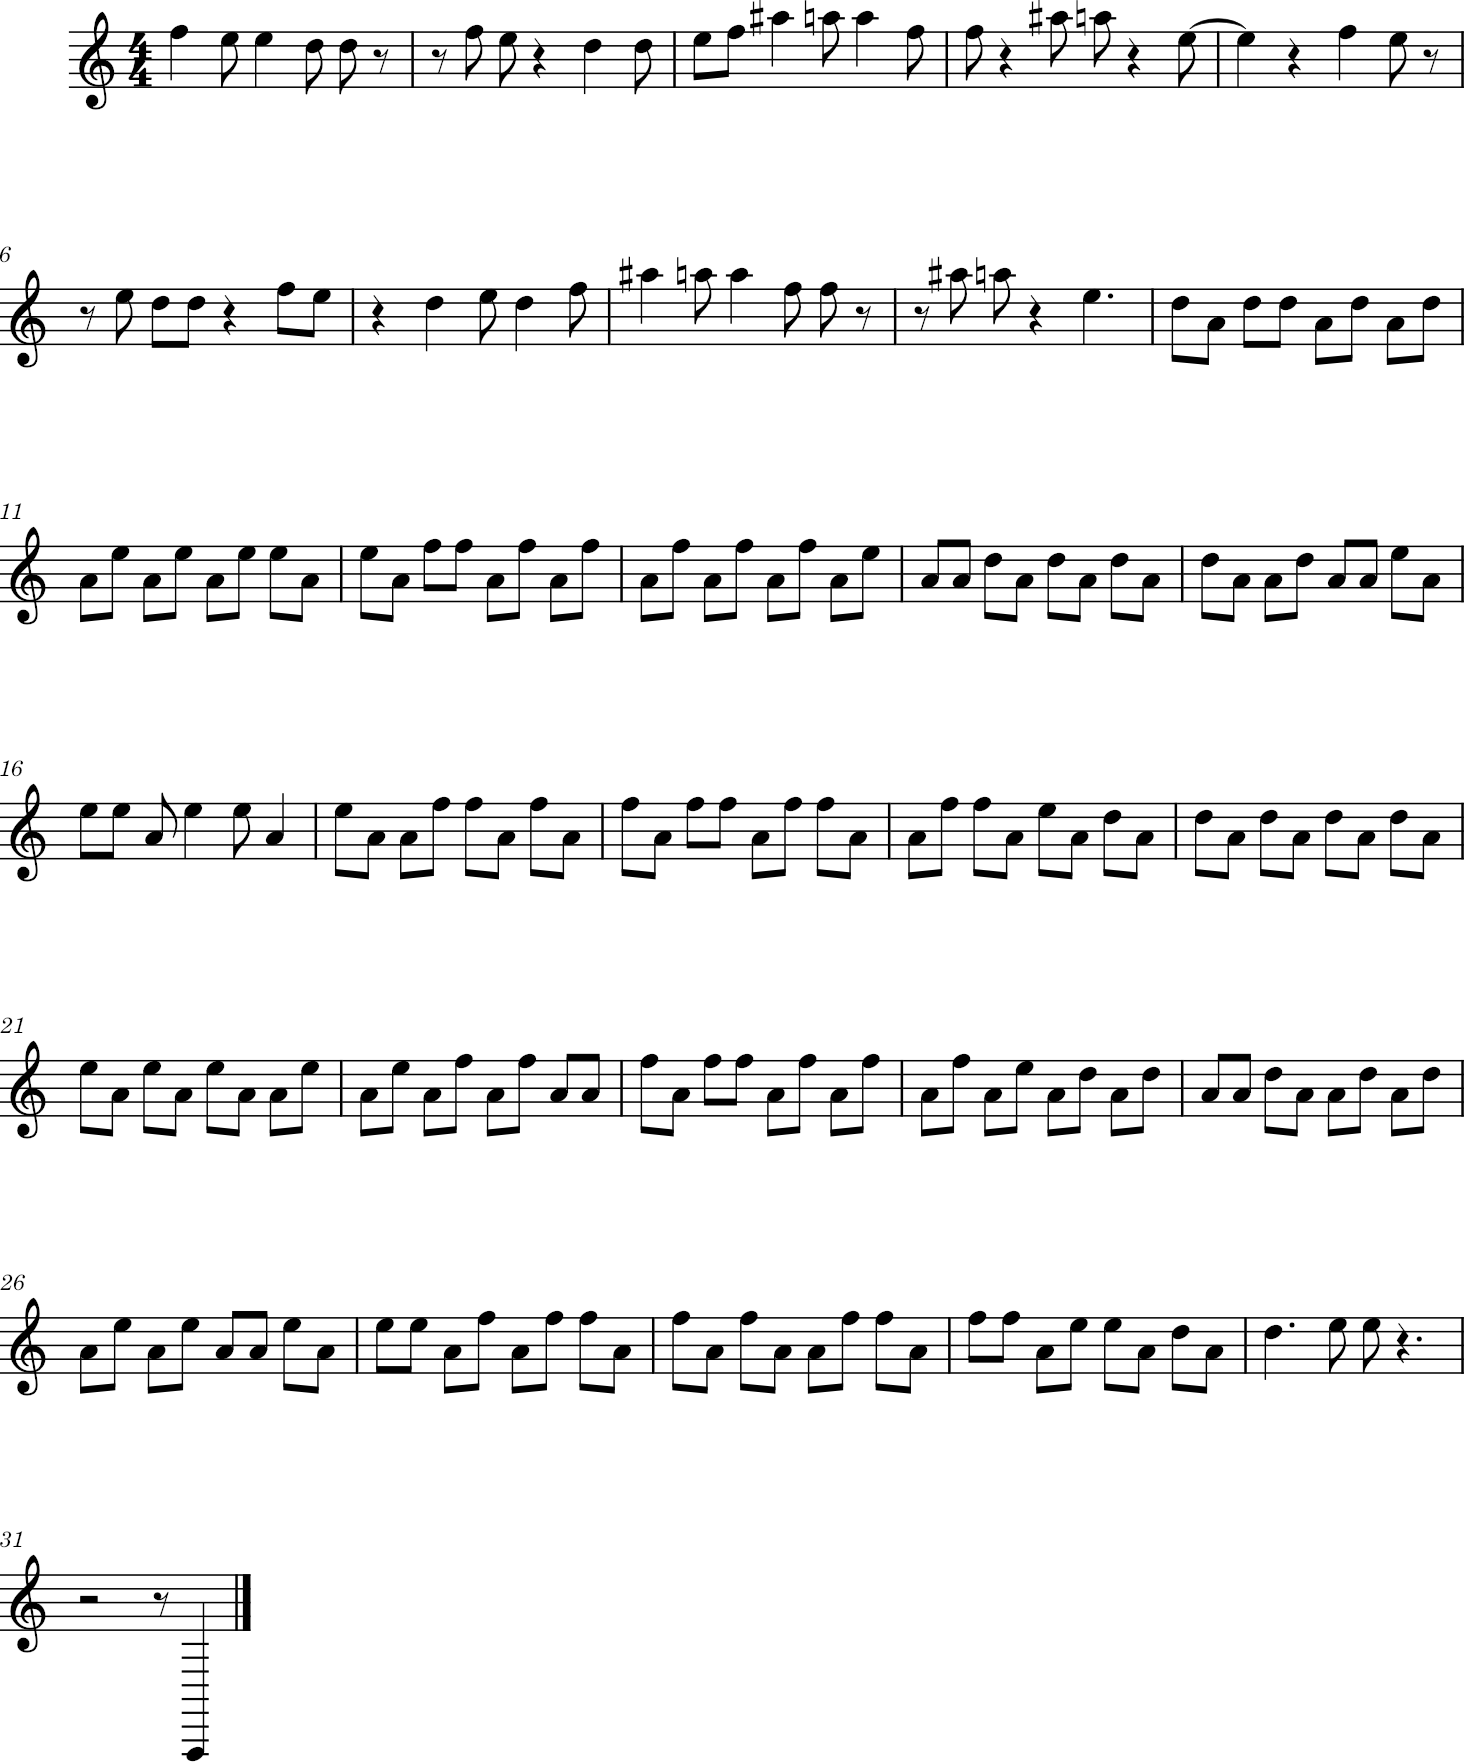

In [96]:
stream1.show()

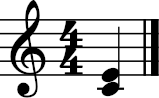

In [49]:
# Create two notes (C and E) and add them to the stream
musical_stream = stream.Stream()

note_c = note.Note("C")
note_e = note.Note("E")
musical_stream.append(note_c)

# Create a Chord object with the two notes
chord_notes = [note_c, note_e]
chord_element = chord.Chord(chord_notes)

# Add the chord to the stream
musical_stream.replace(musical_stream.notes[0], chord_element)
# Show the musical stream
musical_stream.show()

In [188]:
import pretty_midi

input_midi_file = 'forest.midi'

midi_data = pretty_midi.PrettyMIDI(input_midi_file)

current_tempo = midi_data.estimate_tempo()

print(f"Current Tempo: {current_tempo} BPM")

new_tempo = current_tempo * 60 / 150

for instrument in midi_data.instruments:
    for note in instrument.notes:
        note.start *= 150 // 60  # Adjust note start times to reflect the new tempo
        note.end *= 150 // 60  # Adjust note end times to reflect the new tempo

# Save the modified MIDI file
output_midi_file = 'your_output_file.mid'
midi_data.write(output_midi_file)


Current Tempo: 149.68107725017722 BPM


In [9]:
from music21 import *

# Replace 'your_file.mid' with the path to your MIDI file
midi_file_path = 'your_file.mid'

# Load the MIDI file
midi_stream = converter.parse("data/midi/kolduna.mid")

# Print information about the MIDI file
print("MIDI File Information:")
print(f"Title: {midi_stream.metadata.title}")
print(f"Composer: {midi_stream.metadata.composer}")
print(f"Key Signature: {midi_stream.analyze('key')}")
print(f"Number of Parts: {len(midi_stream.parts)}")

# Iterate through the parts and notes
for i, part in enumerate(midi_stream.parts):
    print(f"\nPart {i + 1} - {part.partName if part.partName else 'Unknown'}:")

    # Iterate through the notes in the part
    for element in part.flat:
        if isinstance(element, note.Note):
            print(f"Note: {element.nameWithOctave} - Duration: {element.duration.quarterLength}")
        elif isinstance(element, chord.Chord):
            notes = ' '.join(n.nameWithOctave for n in element.pitches)
            print(f"Chord: {notes} - Duration: {element.duration.quarterLength}")

MIDI File Information:
Title: None
Composer: None
Key Signature: d minor
Number of Parts: 1

Part 1 - Electric Piano:
Note: C#2 - Duration: 0.25
Note: F5 - Duration: 0.75
Note: E5 - Duration: 0.5
Note: E5 - Duration: 0.75
Note: D5 - Duration: 0.5
Note: D5 - Duration: 1.0
Note: F5 - Duration: 0.5
Note: E5 - Duration: 0.75
Note: D5 - Duration: 0.75
Note: D5 - Duration: 0.75
Note: E5 - Duration: 1/3
Note: F5 - Duration: 0.5
Chord: B-5 F5 - Duration: 0.25
Chord: B-5 F5 - Duration: 0.25
Note: A5 - Duration: 0.5
Note: A5 - Duration: 1/3
Note: A5 - Duration: 0.75
Note: F5 - Duration: 0.5
Note: F5 - Duration: 1.25
Note: B-5 - Duration: 0.5
Note: A5 - Duration: 0.5
Note: A5 - Duration: 1/3
Note: E5 - Duration: 2.0
Note: A5 - Duration: 5/12
Note: F5 - Duration: 0.75
Note: E5 - Duration: 0.5
Note: E5 - Duration: 1/3
Note: E5 - Duration: 0.5
Note: D5 - Duration: 0.5
Note: D5 - Duration: 1.25
Note: F5 - Duration: 1/3
Note: E5 - Duration: 0.75
Note: D5 - Duration: 0.75
Note: D5 - Duration: 1.0
Note:

C:\Users\user\.virtualenvs\KIDS\lib\site-packages\IPython\core\interactiveshell.py:3550: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
midi_stream.parts

<music21.stream.iterator.StreamIterator for Score:0x2148f1ccf70 @:0>